## Seen and the Unseen
<p>


I started my journey in programming by learning C, C++ and for the past two years I've been working with Java. I recently started learning python because of its use and popularity in diverse fields such as web, game development, machine learning, AI, Data Science, etc,. My general approach for learning all these languages was that I would first understand the syntax, take up a problem, understand its requirements, and then try implementing it. It somewhat mimics the steps that are followed in developing a software, where first there is gathering of requirements, analysing, designing and developing of software that meets those requirements. As I went on developing more and more experience I realised that there is more than just meeting the requirements. Refering to Frédéric Bastiat's "<a href = 'http://bastiat.org/en/twisatwins.html'>That Which is Seen, and That Which is Not Seen</a>", I refer to the concept of writing a program that meets the requirements as the seen aspect of it. However, software development is more than that. A good software is maintainable, ensures correctness and efficiency, is reliable. This is what I call the unseen part of it. Inorder to make the seen better a good amount of time has to be spent on the unseen.
<p>This article focuses on the unseen part of programming. To show how the unseen affects the seen I am going to use Taylor Series as an example. Below is an introduction to the Taylor Series and few of the functions that I will be working on through out this article.

### Taylor Series
<p>A Taylor Series is an expansion of a function into an infinite sum of terms, with increasing exponents of a variable. Any continuous function can be expressed as Taylor Series. To know more about Taylor Series click 
    <a href='https://en.wikipedia.org/wiki/Taylor_series'>here</a>.
<p>In this exercise we will be looking at the following functions

#### The geometric series  $\frac{1}{(1-x)}$
<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 

#### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 


#### The Trigonometric functions
$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

***

### Testing function


An implicit requirement of a software is that it should be of good quality. If the software is of good quality then it will last longer, perform satisfyingly, and give the right output. There is a need to ensure that a software gives the right output and this is where the unseen comes into the picture. The unseen that I am talking about here is the testing of a function to check for correctness. Testing helps point out errors, defects so that appropriate changes can be made. This improves the accuracy of the function and hence the seen improves. The unseen helps in improving the quality of the software while developing it and determines the quality of the software / seen after developing it.

Here is a function for checking correctness. Anytime I make a change in one of my functions I will call this function to check its accuracy.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Testcases for different functions
testcase_gp = np.linspace(0.1, 1, num = 9, endpoint = False)
testcase_exp = np.linspace(20, 70, num = 50, endpoint = False)
testcase_trig = np.linspace(0, 2*np.pi, num = 100, endpoint = False)

#Testing Function
def test(func1, func2, testcase) :
    
    ourvalues = []
    actualvalues = []
    error = []
    failed= []
    for i in testcase :
        o = (func1(i)[0])
        a = (func2(i))
        ourvalues.append(o)
        actualvalues.append(a)
        e = ((a-o)/a)*100
        error.append(e)
        if e > 0.01 :
            failed.append(i);
            
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    ax[0].plot(testcase, ourvalues, color = 'red')
    ax[0].set_title(func1.__name__ + "()")
    ax[0].set_xlabel("testcases")

    ax[1].plot(testcase, actualvalues)
    ax[1].set_title(func2.__name__+"()")
    ax[1].set_xlabel("testcases")

#         ax[1][0].plot(ourvalues,color = 'red')
#         ax[1][0].plot(actualvalues)
#         ax[1][0].legend([func1.__name__ + "()", func2.__name__+"()"])

    ax[2].set_title("Superimposition of "+func1.__name__ + "()" +" and "+ func2.__name__+"()")
    ax[2].plot(testcase, error)
    ax[2].set_title("error")
    avg_error = sum(error)/len(error)

    if(avg_error < 0.01) :
        fig.suptitle("All test cases passed, Accuracy: "+str(100-avg_error), fontsize = 12)
        ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n < 0.01%",
                   size=12, ha="center", transform=ax[2].transAxes)
    else :
        fig.suptitle("Accuracy: "+str(100-avg_error), fontsize = 12)
        ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n > 0.01%",
                   size=12, ha="center", transform=ax[2].transAxes)

    
#    if func1.__name__ == "cal_sine_cosine" :
#         if func2.__name__ == "cos" :
#             c = 0
#         else:
#             c = 1
#         ourvalues = []
#         actualvalues = []
#         error = []
#         for i in testcase :
#             o = round(func1(i,c)[0],7)
#             a = round(func2(i),7)
#             ourvalues.append(o)
#             actualvalues.append(a)
            
#             error.append(((a-o)/a)*100)
#         fig, ax = plt.subplots(1,3,figsize=(20,5))
#         ax[0].plot(ourvalues, color = 'red')
#         ax[0].set_title(func1.__name__ + "()")
#         ax[1].plot(actualvalues)
#         ax[1].set_title(func2.__name__+"()")
#         ax[2].plot(error)
#         ax[2].set_title("error")
        
def gp(x) :
    return (1/(1-x))

***


### The geometric series 
<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 
<br>This holds true when $|x| < 1$

Since the value of $|x| < 1$ and the power goes on increasing, the series converges. This means that the end terms approximate to zero. 
<p>The funciton below plots the first 20 terms i.e., ' 1, $x$, $x^2$, $\dots$, $x^{19}$ ', for all values of x passed to it in the list.

In [3]:
'''This function plots the terms from 0th to 20th power$'''
def plot_term(terms) :
    l = []
    for x in terms :
        sl = []
        for i in range(0,20) :
            sl.append(x**i)
        l.append(sl)

    
    if len(l) == 1 :
        fig, ax = plt.subplots(1,1, figsize = (5,5))
        ax.plot(l[0]);
        ax.set_title(terms[0]);
        ax.set_ylabel(str(terms[0])+"$^i$");
        ax.set_xlabel('i');
    else:
        fig, ax = plt.subplots(1, len(l), figsize = (20,4))
        
        for i in range(0,len(l)) :
            ax[i].plot(l[i]);
            ax[i].set_title(terms[i]);
            ax[i].set_ylabel(str(terms[i])+"$^i$");
            ax[i].set_xlabel('i');
            ax[i].text(5, l[i][5]+0.05, round(l[i][5],3), color = 'red')
            #  ax.text(i, tup1[1]-0.6, tup1[1], color = 'red')
#         ax.text(i, tup2[1]+0.4, tup2[1], color = 'purple')

Here is a graph for $0.7$, see how it coverges as the power of the term increases.

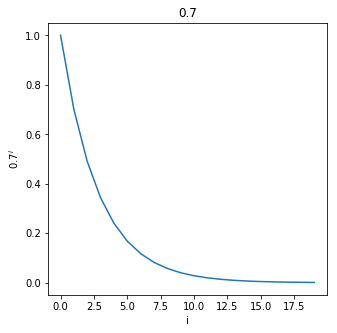

In [4]:
term = [0.7]
plot_term(term)

Taylor Series is an infinite series but the loop cannot go on forever, so I terminate the loop as soon as a term reaches zero. This is the naive implementation for finding the sum of a geometric preogression. I will then make changes to optimize the number of iterations that my function takes and another to calculate the term in the series

![title](img/gpsum.png)

In the end I will put these two optimizations together and see how it affects the function.

-----
#### Naive Implementation

In [5]:
%%timeit
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + pow(a,i)
        i = i + 1
        b = pow(a,i)
gpsum(0.8)

3.16 ms ± 347 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Python provides another way to find the power of a given number

In [6]:
%%timeit
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + a**i
        i = i + 1
        b = pow(a,i)
gpsum(0.8)

2.87 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0) :
        s = s + a**i
        i = i + 1
        b = pow(a,i)
    return s, i

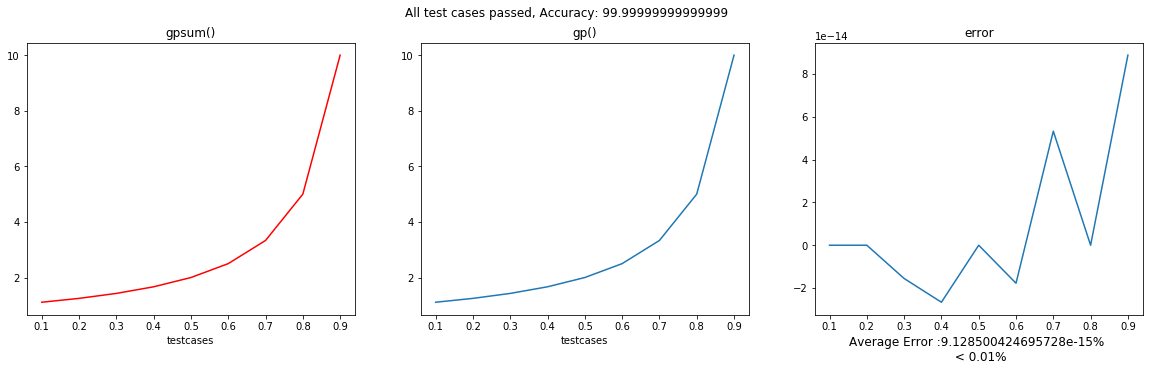

In [8]:
test(gpsum,gp,testcase_gp)

The loop terminates when a term reaches $0$. Therefore the number of iterations will depend on $|x|$. Below is a graph of first $20$ terms for different values of $x$. This will help in better understanding of the relation between $|x|$ and no.of iterations.

I am testing the functions against $\frac {1}{1-x}$, the average error remains below $0.01\%$.

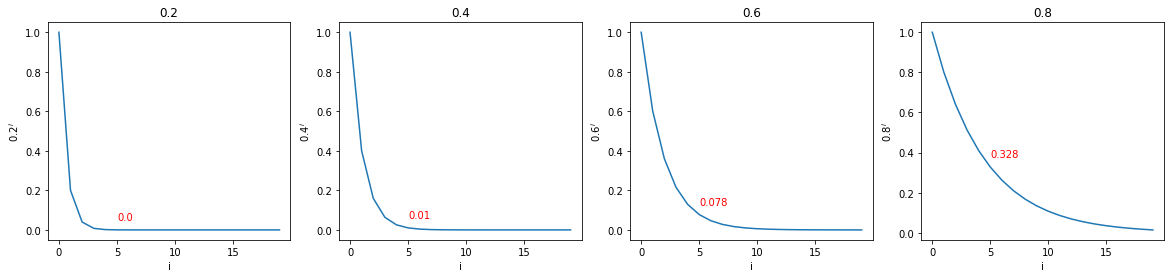

In [9]:
terms = [0.2, 0.4, 0.6, 0.8]
plot_term(terms)

The terms in red are the $x^{4}$ and are rounded off to the $3^{rd}$ decimal. For $x = 0.2$ the series has already converged, where as for $x = 0.8$ its still at $0.3$.
<p><b>Therefore while comparing the computation time for different functions I will be using 0.5 as base value.</b>
<p><p>The graph below shows no.of iterations required to  find the answer for different values of $x$.

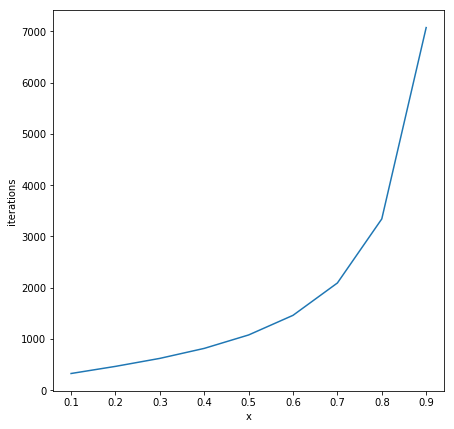

In [10]:
itr1 = []
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in a :
    itr1.append(gpsum(i)[1])
    
fig, ax = plt.subplots(1, 1, figsize = (7,7))
ax.plot(a,itr1);
ax.set_xlabel('x');
ax.set_ylabel('iterations');

Limiting these no.of iterations is my first case of optimization.

#### 1] Set a precision limit to reduce the number of iterations

There are 53 bits of precision available for python float, due to which the calculations continue till the $53^{rd}$ bit. This level precision causes the no.of iterations to reach upto 7000. For this particular function of $gpsum()$, the error is less than $0.01\%$ and the precision of error is $1e-14$ in percentage. 
<br>This accuracy of $99.99\%$ can be obtained with a lower precision as well. The graphs below help in understanding the relation between precision / tolerance, iterations and error. 
<p>It can be observed that $0.9$ takes the highest no.of iterations. I will $0.9$ as my base value for comparing these 3 different factors. I've chosen the tolerance range from $0.1$ to $1e-16$ as the error precision goes upto $1e-16$. 

In [11]:
# modifying gpsum() such that it checks it against a given tolerance
def gp_prec_tol(x, tole) :
    s = 0
    count = 0
    t = 1 
    while abs(t) > tole :
        t = x**count
        s = s + t
        count += 1
    return s, count


In [12]:
# Creating tolerance list
tolerance_list = [0.1]
k = 0.1
for i in range (0,15) :
    k /= 10
    tolerance_list.append(k)


<b>Here is a generic function that plots the relation between iterations, tolerance and error

In [13]:
def analyse(func,func1,x):
    
    itr = []
    error = []
    ans = func1(x)
    fig, ax = plt.subplots(1, 2, figsize =(15,7.5))
    c = 0
    coord = ()
    flag = False
    for i in tolerance_list :
        tup = func(x, i)
        itr.append(tup[1])
        er = ((ans - tup[0])/ans)*100
        c = c + 1
        error.append(er)
        if flag == False and er < 0.01 :

            coord = (c,i,er)
            #ax[1].text(i, er+1, i, color = 'red')
            flag = True

    ax[0].set_title("Iterayions vs. Tolerance");
    ax[0].plot(itr, color = 'purple');
    ax[0].set_ylabel("No.of Iterations");
    ax[0].set_xlabel("Tolerance");
    plt.setp(ax, xticklabels=[0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]);
    ax[1].set_title("Error Vs. Tolerance")
    ax[1].plot(error, color = 'indigo');
    ax[1].text(coord[0],coord[2]+coord[2], (coord[1],coord[2]), color = "green")
    ax[1].set_ylabel("Error");
    ax[1].set_xlabel("Tolerance");
    fig.suptitle("For "+ func.__name__+"( "+str(x)+" )", fontsize = 12)

    fig, axd = plt.subplots(1,1,figsize = (7,7))
    axd.set_title("Iterations Vs. Error");
    axd.plot(itr, error, color = 'orange');
    axd.set_xlabel("Iterations");
    axd.set_ylabel("Error");



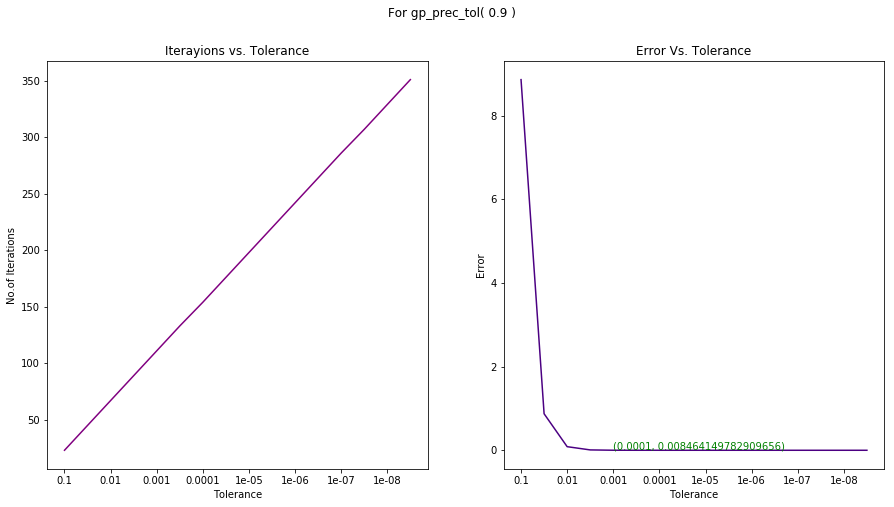

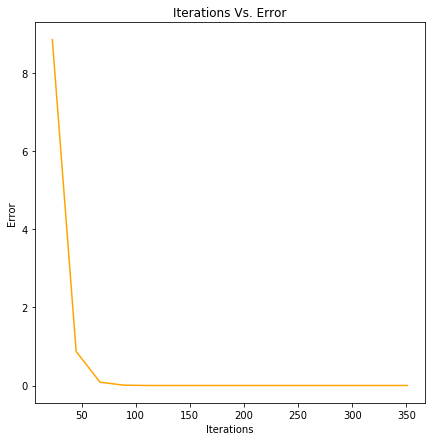

In [14]:
analyse(gp_prec_tol,gp,0.9)

In the graph <b> Error vs. Tolerance</b> The coordinates show the first tolerance that gives an error $< 0.01$ i.e., $tolerance = 0.0001$.
<br>Different observations can be made such as, in the first graph as the tolerance increases the no.of iterations are also increasing, this is happening in a steady manner.<br>In the second graph, there is a drastic fall in the error between $0.1 - 0.01$
<br>Since the Iterations depend on the tolerance and greater the tolerance better the accuracy, we get the third graph accordingly.

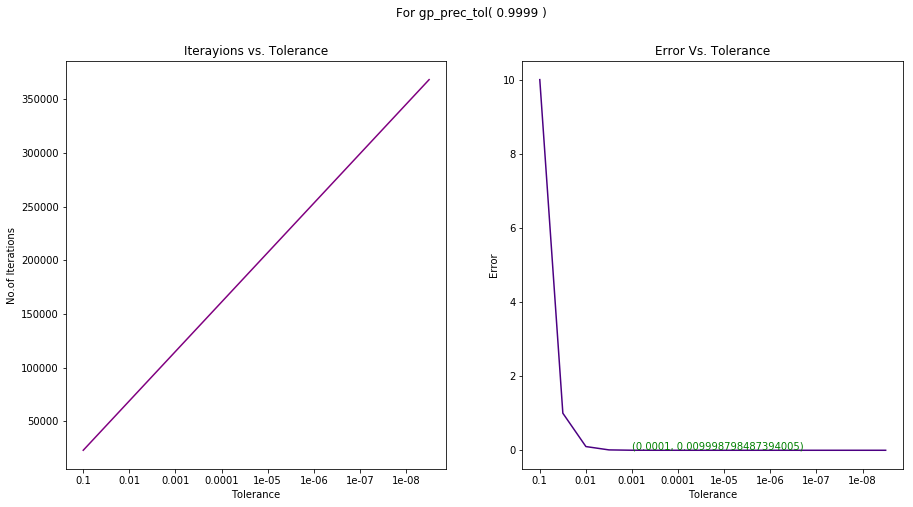

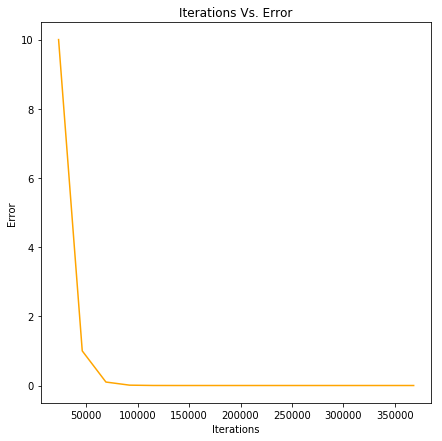

In [15]:
analyse(gp_prec_tol,gp,0.9999)

From the above result, I am setting my <b>threshold as $0.0001$.

In [16]:
%%timeit
def pow_sum_limit(a):
    s = 0
    count = 0
    t = 1 
    while t > 0.0001 :
        t = a**count
        s = s + t
        count += 1
    return s

pow_sum_limit(0.5)

6.37 µs ± 491 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### This change simply made it $340\times$ faster ! 

In [17]:
def gpsum_limit(a):
    s = 0
    count = 0
    t = 1 
    while t > 0.0001 :
        t = a**count
        s = s + t
        count += 1
    return s, count

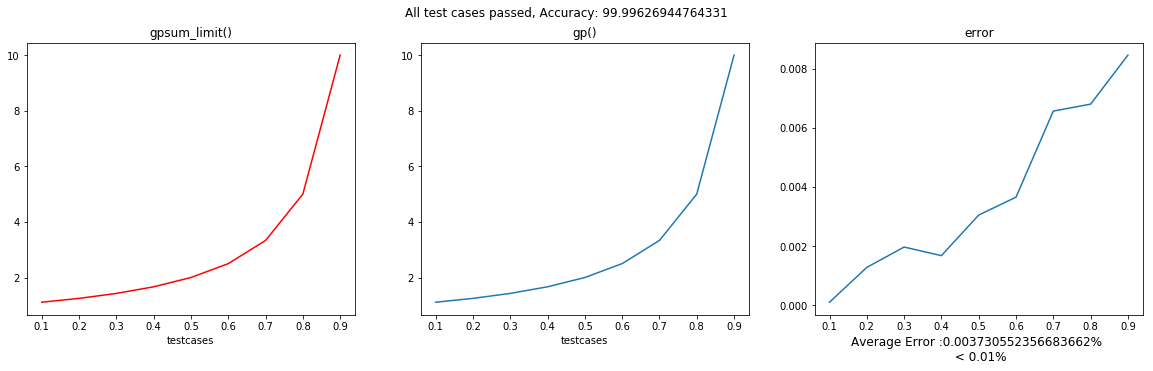

In [18]:
test(gpsum_limit,gp,testcase_gp)

Below is a function that will plot the number of iterations taken by the two functions and also plot another graph with that value of the sum along with respective value of $\frac {1}{1-x}$

In [19]:

def compare_functions(func1,func2):
    itr1 = []
    itr2 = []
    actual = []
    ans1 = []
    ans2 = []
    for i in a :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])
        itr2.append(tup2[1])
        ans1.append(tup1[0])
        ans2.append(tup2[0])
        actual.append(1/(1-i))    
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].plot(a,itr1, color = 'red')
    ax[0].plot(a,itr2)
    ax[0].text(0.85,itr1[-1],itr1[-1])
    ax[0].text(0.9,itr2[-1]+100,itr2[-1])
    ax[0].legend([func1.__name__+"()", func2.__name__+"()"])
    ax[0].set_title("Iterations")
    ax[0].set_ylabel("No.of Iterations")
    ax[0].set_xlabel("$x$")
    ax[1].plot(a, ans1, color = 'red')
    ax[1].plot(a, ans2)
    ax[1].plot(a, actual)
    ax[1].legend([func1.__name__+"()",func2.__name__+"()","${1}/{(1-x)}$"])
    ax[1].set_title("Values of geometric series")

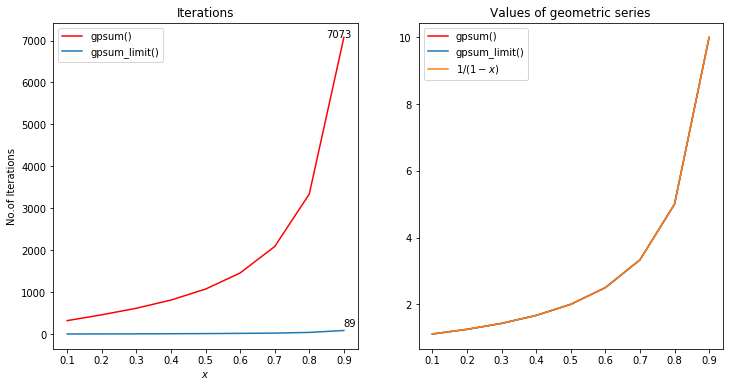

In [70]:
compare_functions(gpsum,gpsum_limit)

In [71]:
print(gpsum(0.9))
print(gpsum_limit(0.9))

(9.999999999999993, 7073)
(9.99915358502171, 89)


We can see that for $0.9$, the naive implementation takes near about 7000 iterations whereas when we set a limit the number of iterations do not even reach 100. Setting the precision limit to $0.0001$ we loose some accuracy but we gain a speed up of $340\times$. The average error still remains below $0.01\%$


------

#### 2] Optimizing the power function

<p>Instead of calculating a**i at every iteration, I will use the previously calculated term and multiply it by $x$. It would go something like this
<br>$x$
<br>$(x)\cdot x$
<br>$(x\cdot x)\cdot x$
<br>$(x\cdot x\cdot x)\cdot x$
<br>$\dots$


In [ ]:
%%timeit
def gpsum_limit1(a):
    s = 1
    t = 1
    while t != 0 :
        t = t*a
        s += t
    return s
gpsum_limit1(0.5)

### We get a speed up of $18\times$

In [ ]:
def gpsum_limit1(a):
    s = 1
    t = 1
    count = 1
    while t != 0 :
        t = t*a
        s += t
        count +=1
    return s, count

In [ ]:
# test(gpsum_limit1,gp,testcase_gp)

### Putting the two optimizations together

In [ ]:
%%timeit
def pow_sum_limit2(a):
    s = 1
    t = 1
    count = 1 
    while t > 0.0001 :
        t = t*a
        s = s + t
        count += 1
    return s

pow_sum_limit2(0.5)

### Speed up of $650 \times$
Limiting the number of iterations gave me a speed up of $300\times$, putting it togther almost doubles it.  

In [ ]:
def pow_sum_limit2(a):
    s = 1
    t = 1
    count = 1 
    while t > 0.0001 :
        t = t*a
        s = s + t
        count += 1
    return s, count

test(pow_sum_limit2,gp,testcase_gp)

To summarize the steps taken to find the geometric progression
<ul>
    <li>I started off with a naive implementation where I go on iterating till I get a term that is equal to $0$.</li> 
    <li>To avoid those extra iterations I set a precision limit to the loop which gave a speed up of <b>$340\times$ while maintaining an accuracy of $99.9\%$</b></li>
    <li>Then instead of calculating the exponential term for every iteration, I used the value produced in the previous       iteration and multiplied it with $'x'$. Which gave a speedup of $650\times$.</li>
    </ul>

***

### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 

In the exponential funciton there is a factorial in every term. Python provides a math.factorial(x) function that calculates the factorial of x. This adds to one more case in optimization of the function.
<br>Following are the optimizations that I will be working on for this function.
![title](img/exp.png)


<p> In the end I will put these optimizations together to see how it affects the efficiency and accuracy. 

***

#### 1] Finding the terminating condition
<p>The following graph shows the $terms\ in\ e^2$, $terms\ in\ e^5$

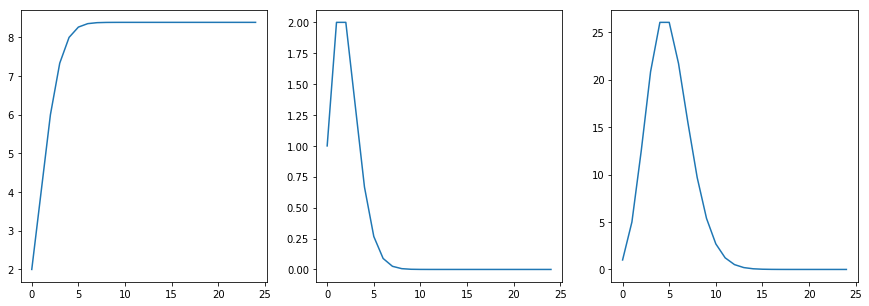

In [21]:
e = 1 
i = 0
l = []
terms = []
terms2 = []
while i < 25 :
    t = 2**i/math.factorial(i)
    t1 = 5**i/math.factorial(i)
    e += t
    i = i + 1
    l.append(e)
    terms.append(t)
    terms2.append(t1)
    
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(l);
ax[1].plot(terms);
ax[2].plot(terms2);

As the series progresses the terms in the series initially rise to a certain value and then approach zero. This means that the values of the series won't change once we start adding zero to it. For exponential function I will keep this as the terminating condition for the naive implementation.

In [22]:
%%timeit
def e_pow(x):
    e_to_2 = 0
    t1 = 1
    t2 = 0
    i  = 0 
    while True:
        e_to_2 += x**i/math.factorial(i)
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 : # The value of series doesn't change 
            break
    return e_to_2

e_pow(5)

60.6 µs ± 5.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
def e_pow(x):
    e_to_2 = 0
    t1 = 1
    t2 = 0
    i  = 0 
    while True:
        e_to_2 += x**i/math.factorial(i)
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i

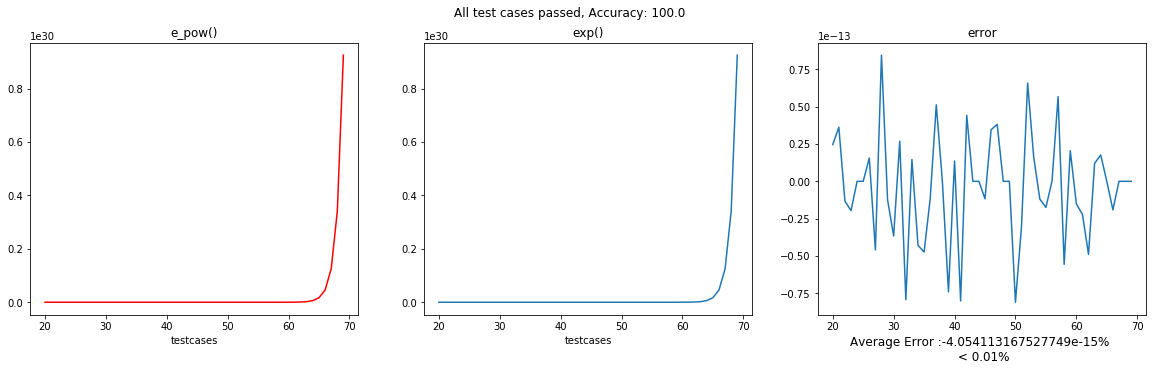

In [24]:
test(e_pow,math.exp,testcase_exp)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

As discussed earlier, python's floating point has 52 bit precision. We will set a precision limit to reduce the number of iterations. Using the analyse function to find the maximum tolerance that gives an error $< 0.01\%$, I'll find the precision limit to reduce the number of iterations.

In [25]:
def e_pow_tol(x, tol):
    e = 0
    i = 0
    t = 1
    while t > tol :
        t = x**i/math.factorial(i)
        e += t
        i += 1
    return e, i

Setting a precision limit to reduce the number of iterations.

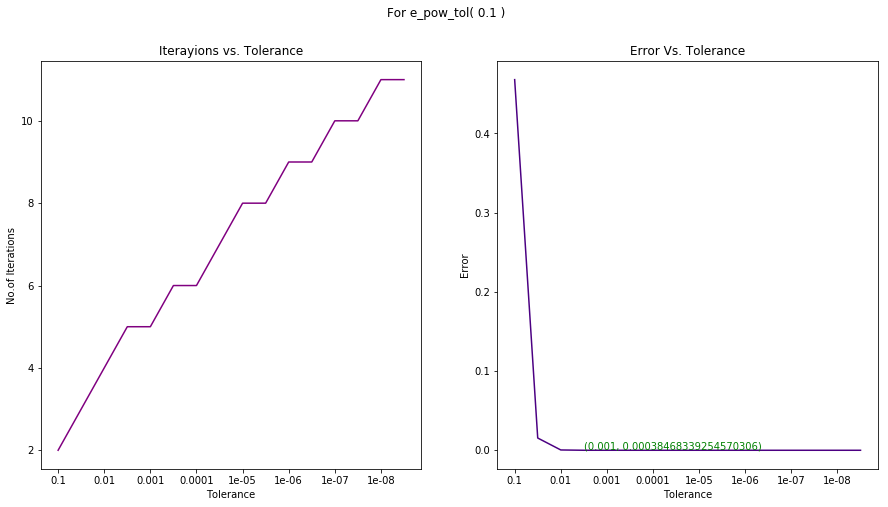

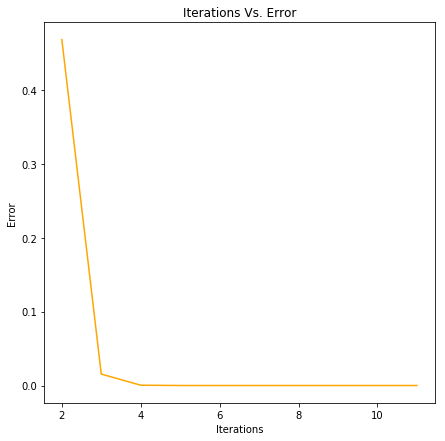

In [26]:
analyse(e_pow_tol,math.exp,0.1)

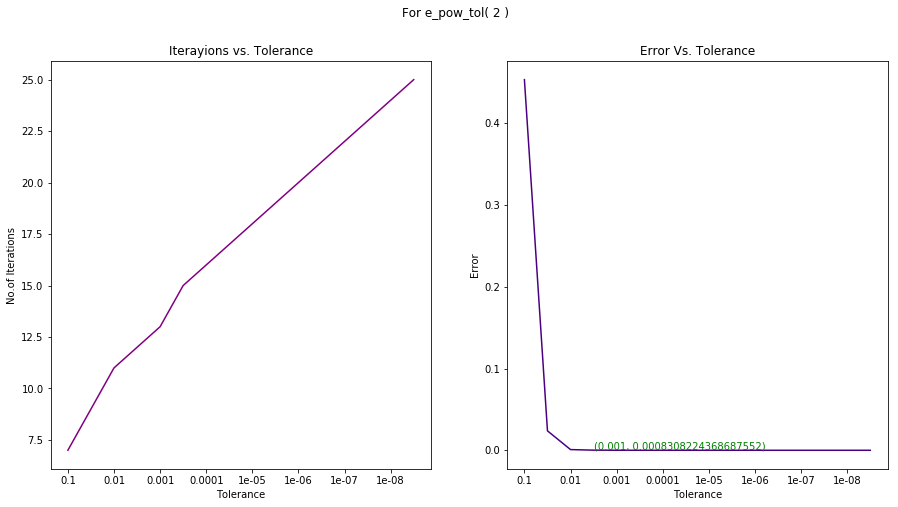

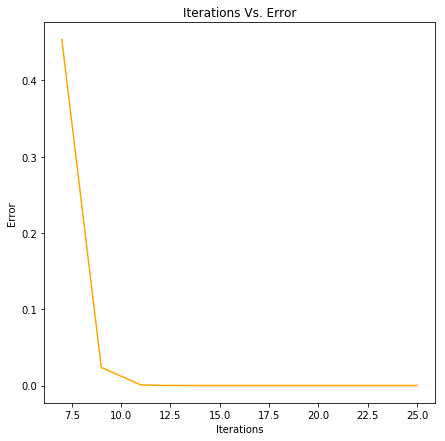

In [27]:
analyse(e_pow_tol,math.exp,2)

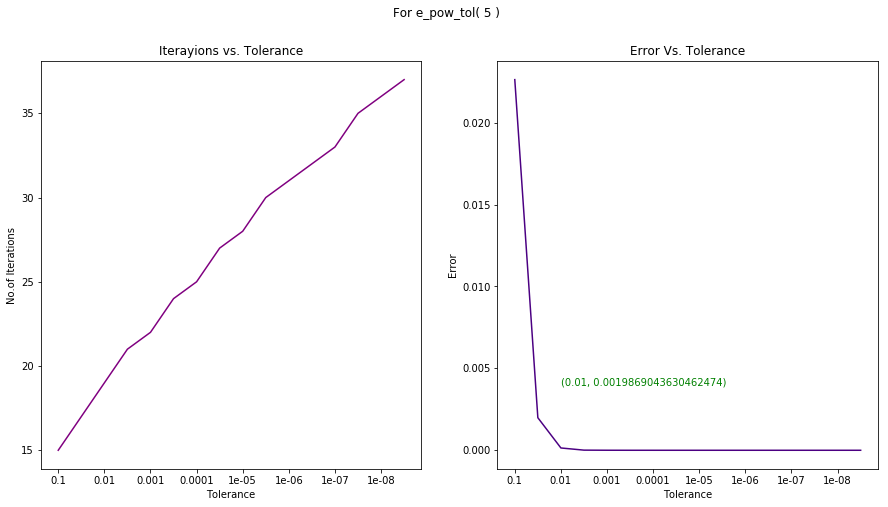

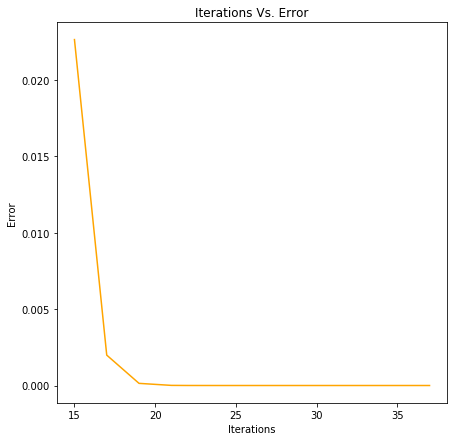

In [28]:
analyse(e_pow_tol,math.exp,5)

As the value of $x$ increases the tolerance increases. Considering $x = 2$, the <b>maximum tolerance is $0.001$.

In [29]:
def e_pow1(x):
    e_to_2 = 1
    t1 = 1
    i  = 0 
    while t1 > 0.001:
        t1 = x**i/math.factorial(i)
        e_to_2 += t1
        i = i + 1
    return e_to_2, i


In [30]:
%%timeit
def e_pow1(x):
    e_to_2 = 1
    t1 = 1
    i  = 0 
    while t1 > 0.001:
        t1 = x**i/math.factorial(i)
        e_to_2 += t1
        i = i + 1
    return e_to_2, i

e_pow1(5)

24.6 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Optimizing the no.of iterations gives a speed up of $5\times$

Comparing the number of iterations taken by the naive approach and optimized function.

In [31]:
def compare_iter(func1, func2) : 
    itr1 = []
    itr2 = []
    actual = []
    ans1 = []
    ans2 = []
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    for i in a :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])
        itr2.append(tup2[1])  
      # ax.plot([i, i], [tup1[1], tup2[1]], color='grey', ls='dotted')
      # ax.text(i, (tup1[1]+tup2[1])/2, tup1[1]-tup2[1], color='orange')
        ax.text(i, tup1[1]-0.6, tup1[1], color = 'red')
        ax.text(i, tup2[1]+0.4, tup2[1], color = 'purple')
    
    ax.plot(a,itr1, color = 'red')
    ax.plot(a,itr2)
    ax.legend([func1.__name__+"()", func2.__name__+"()"])
    ax.set_title("Iterations")
    ax.set_ylabel("No.of Iterations")
    ax.set_xlabel("$x$")
    

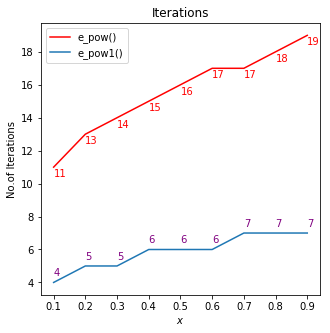

In [32]:
compare_iter(e_pow,e_pow1)

#### The number of iterations are reduced to half

In the exponential function the number of iterations are converging a lot faster than those in the geometric progression. The factorial in the terms of the exponential functions makes the series converge faster.
<p>The tolerance optimzation gave a speedup of $2\times$ and the number of iterations are also reduced to half. This means that the number of <b>iterations directly affect the speedup of te function</b>.

***

#### 2] Replacing power function
<p>Using the same logic that was used in geometric progression to find the $n^{th}$ term using the $(n-1)^{th}$ term.

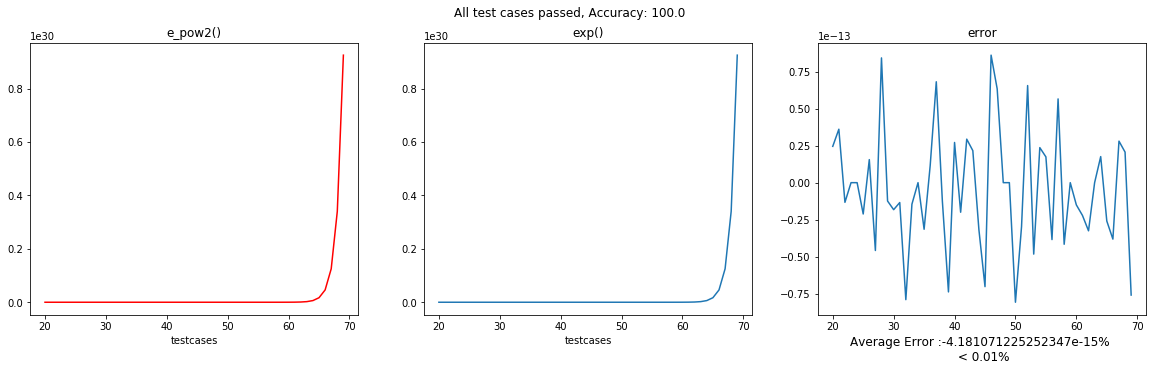

In [33]:
def e_pow2(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    i = 1 
    while True:
        term = term*x
        t1 = term / math.factorial(i)
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i

#testcase = np.linspace(30, 101,num = 70,endpoint=False)
test(e_pow2,math.exp,testcase_exp)

In [34]:
%%timeit
def e_pow2(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    i = 1 
    while True:
        term = term*x
        t1 = term / math.factorial(i)
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i

e_pow2(5)

38 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### This gives a speedup of $4\times$

***


#### 3] Replacing factorial 

Factorial of any given number $n!$  is given as 
<br>
$n! = (n) \cdot (n-1) \cdot (n-2) \dots 2 \cdot 1$
<br>In our function as we go on iterating, we are incrementing the value of $i$ by $1$ and at every iteration we are finding the value of math.factorial(i). Instead we can store the initial value of $i$ and $1$ and go on multiplying that value at every iteration.

<br>$Iteration - 1 \space \space i = 1 \space \space fact = 1$<br><br>$Iteration - 2 \space \space i = 2 \space \space fact = 1\cdot i$<br><br>$Iteration - 3 \space \space i = 3 \space \space fact = 1\cdot 2 \cdot i$<br><br>$\dots$<br>
<br>

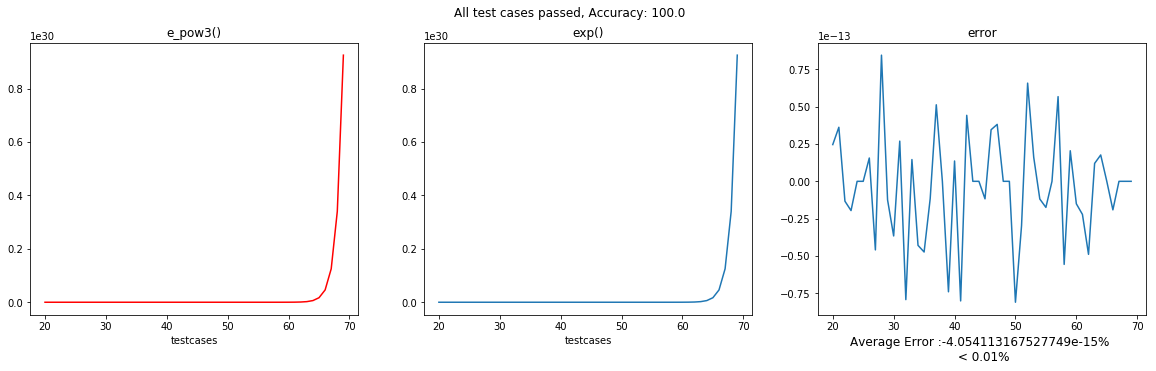

In [35]:
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    fact = 1
    i = 1 
    while True:
        fact *= i
        t1 = x**i / fact
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i

test(e_pow3,math.exp,testcase_exp)

In [36]:
%%timeit 
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t2 = 0
    term = 1
    fact = 1
    i = 1 
    while True:
        fact *= i
        t1 = x**i / fact
        e_to_2 += t1
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2

e_pow3(5)

57.6 µs ± 5.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### The factorial optimization gives a speedup of $3\times$

***

#### 4] Putting 3 optimizations together

In [37]:
%%timeit
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    t1 = float(t1)
    i  = 1 
    term = 1
    fact = 1
    count = 0
    while t1 > 0.001:
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2

e_pow4(5)

13.5 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    t1 = float(t1)
    i  = 1 
    term = 1
    fact = 1
    count = 0
    while t1 > 0.001:
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2, i + 1

#### We get a speed up of 16x by putting all three of the ideas together. 


***

#### Can I optimize it further ?

What we are doing here is we are using the previously calculated exponential value multiplying it by $x$ to find the $x^k$ and similarly for factorial $k!$, our iterator is $i$, therefore we multiply our previously calculated factorial value with $i$ to get $i!$. 
<br>
<br>At every iteration we are calculating $\frac{a\cdot a\cdot a ...}{1\cdot2\cdot3...}$
<br>As the no.of iterations increase the numerator and denominator go on increasing in magnitude, we then divide these two large numbers which is relatively another big calculation. 
<br>
<br>Instead of calculating two big terms we can calculate <br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})\cdot\frac{k}{i+1}$<br><br>$(\frac{k}{i}\cdot\frac{k}{i+1})\cdot\frac{k}{i+2}$<br><br>$\dots$<br>
<br>In all of our previous approach we had initialised the value of exponential sum to zero. Since, we wont be calculating the factorial and exponential terms separately, we need to initialise the sum to 1 

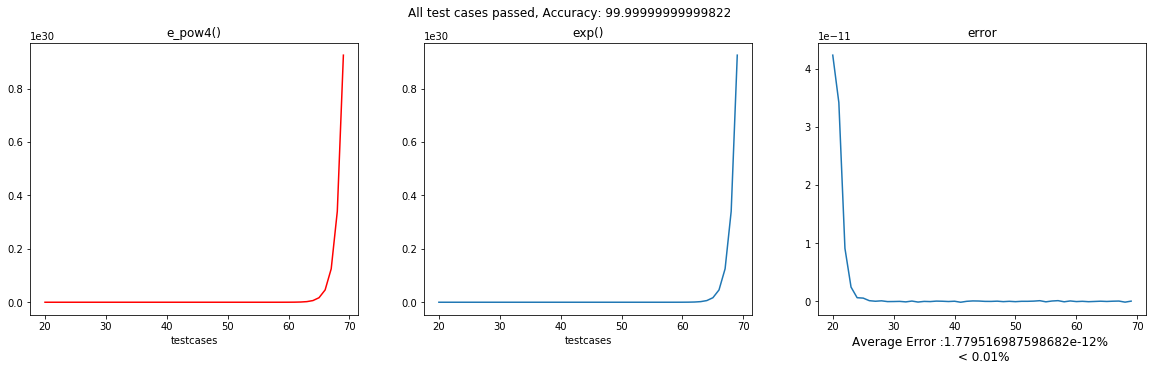

In [39]:
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 0.001:
        t1 = t1*x/i
        e_to_2 += t1
        i = i + 1
    return e_to_2, i + 1

test(e_pow4,math.exp,testcase_exp)

In [40]:
%%timeit
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 1e-5:
        t1 = t1*x/i
        e_to_2 += t1
        i = i + 1
    return e_to_2

e_pow4(5)

6.7 µs ± 286 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Speedup of $34\times$ compared to Naive implementation !

In our previous function <b>e_pow3()</b> we got a speed up of <b>16x</b> and after making a <b>change in the way we were calculating each of our terms</b> in the series we get a speed up of <b>34x</b> as compared to naive and twice as fast when compared to e_pow3(). 
<br>Instead of finding out exponent and factorial separately and then dividing the two to find the term at every iteration we applied the same logic in which we use the previously found term and multiply it with the right factor.

***


### The Trigonometric Functions 

$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

From the exponential function another kind of optimization can be performed on the trignometric series. 

![title](img/trig.png)

#### The Cosine Function
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$


In [41]:
def cos(x) :
    t1 = 1
    cosx = 1
    sign = -1
    i = 1
    while True:
        term = (sign**i)*(x**(2*i))/math.factorial(2*i)
        cosx += term
        i += 1
        if t1 == cosx :
            break
        t1 = cosx
    return cosx,i

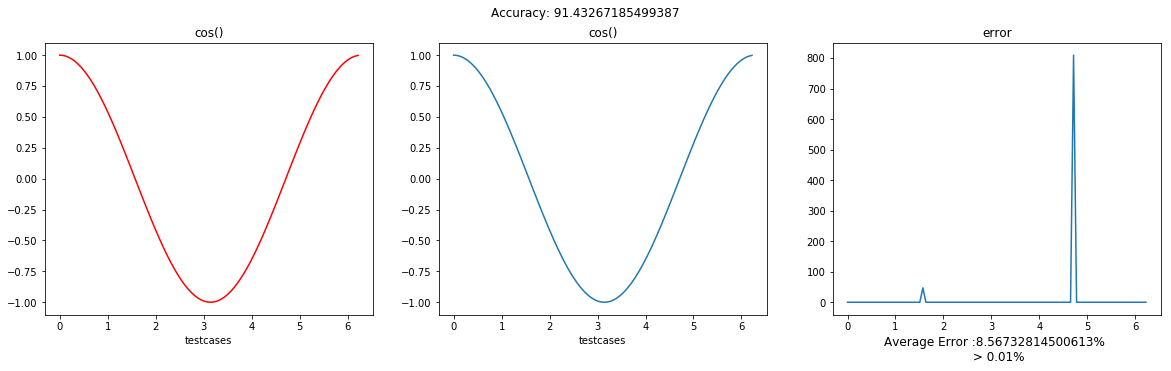

In [42]:
test(cos,math.cos,testcase_trig)

In [43]:
def cosine(x):
    cosx = 1
    t1 = 1
    sign = -1
    i = 2
    while True:
        cosx = cosx + (sign*(x**i))/math.factorial(i)
        sign = -sign
        i = i + 2
        if t1 == cosx :
            break
        t1 = cosx
    return cosx, i 

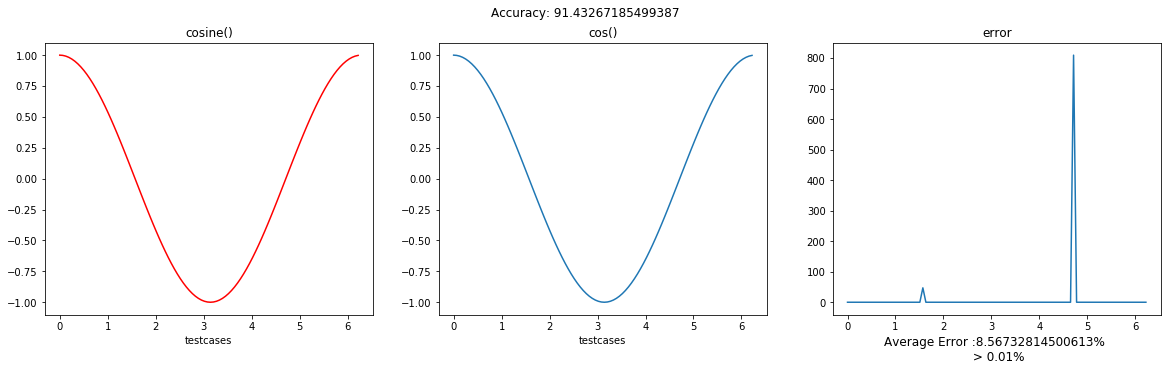

In [44]:
test(cosine,math.cos,testcase_trig)

Similarly naive implementation for finding $\sin x$


$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$

In [45]:
def sin(x):
    t1 = i =sine = 0
    sign = -1
    while True:
        sign = -sign
        sine = sine + ((x**(2.0*i+1))/math.factorial(2*i+1))*sign
        i = i + 1
        if t1 == sine : 
            break
        t1 = sine
    return sine, i


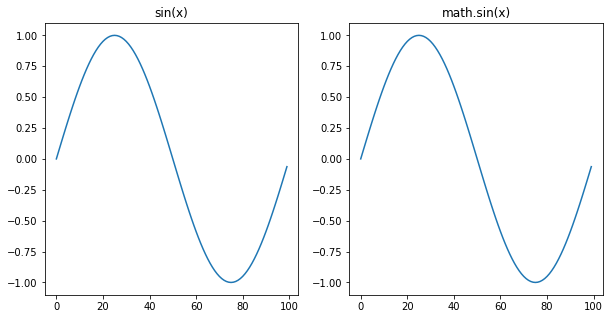

In [46]:
itr1= []
itr = []
for i in testcase_trig :
    itr.append(sin(i)[0])
    itr1.append(math.sin(i))
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(itr);
ax[0].set_title("sin(x)")
ax[1].plot(itr1);
ax[1].set_title("math.sin(x)");

________________________

The sine and cosine functions are basically the same, the sine function consits of all the odd powered terms and cosine consists of all the even powered terms. Sine and Cosine can be calculated using one function alone.
### Here is a function that calculates both sine and cosine 
Using the indicator i = 0 for cosine and i = 1 for sine

In [47]:
%%timeit
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    while True:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val

cal_sine_cosine(np.pi/3,1)

13.3 µs ± 876 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    n = 0
    while True:
        n = n + 1
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, n

In [49]:
def find_cos(x) :
    return cal_sine_cosine(x,0)
    
def find_sin(x) :
    return cal_sine_cosine(x,1)

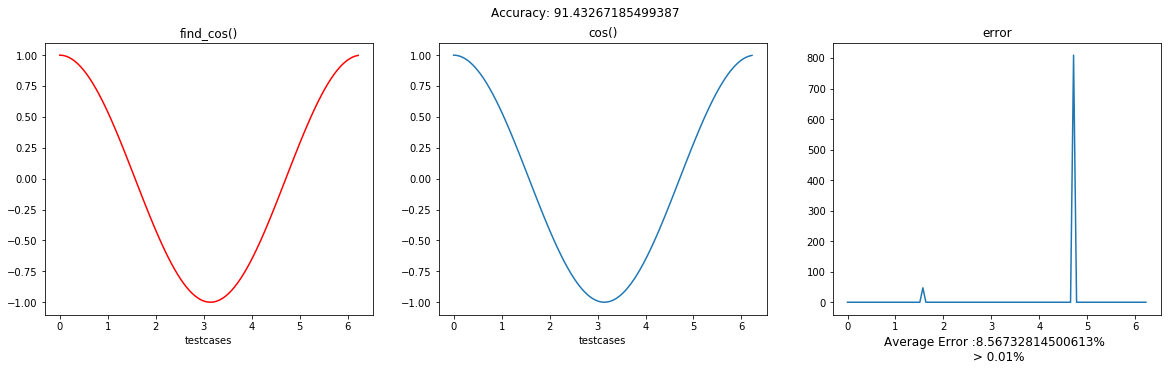

In [50]:
test(find_cos,math.cos,testcase_trig)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


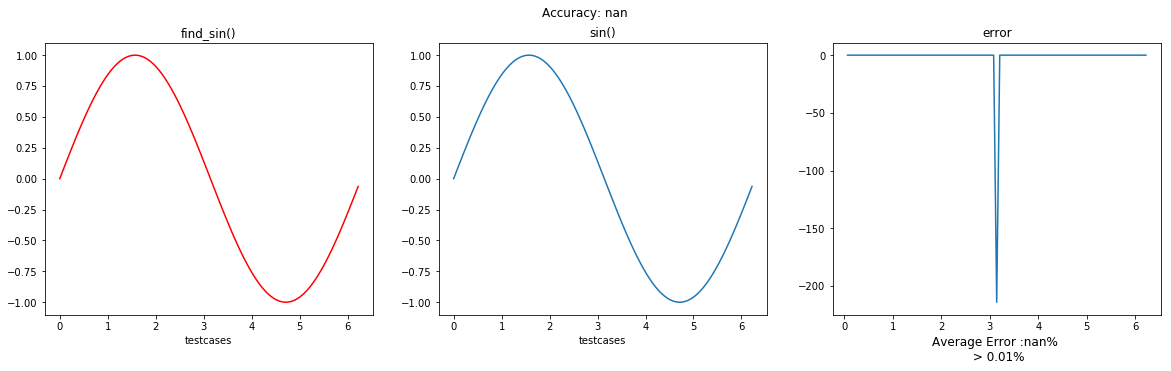

In [51]:
test(find_sin,math.sin,testcase_trig)

#### You can use this function to find values of $cos x$ and $sin x$ in the following way

Here is a testing function, where in you can check how correctly does your function calculate the values 
<br>As we would be performing optimizations on our functions we need to keep checking if the values calculated are correct values.

<br>
Instead of using (x**i), we find the power and factorial in an efficient way and see its computing time

In [52]:
%%timeit
def cal_sine_cosine1(x,i) :
    t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while True:
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val

cal_sine_cosine1(np.pi/3,1)

6.12 µs ± 528 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Computation time has decreased from around 11$\mu s$ tp 7$\mu s$
<br>Lets see how accurate this function is 

In [53]:
def cal_sine_cosine1(x,i) :
    t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while True:
        n = n + 1
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, n

def find_cos(x) : 
    return cal_sine_cosine1(x,0)
def find_sin(x) :
    return cal_sine_cosine1(x,1)

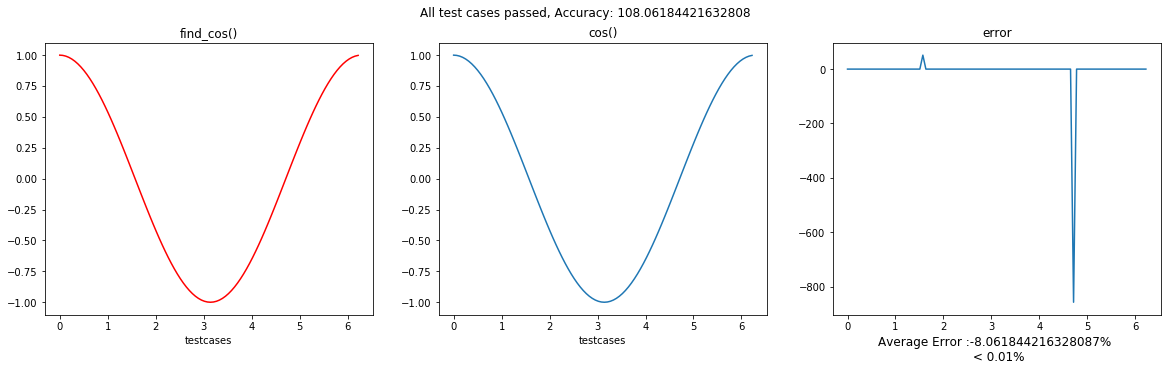

In [54]:
test(find_cos,math.cos,testcase_trig)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


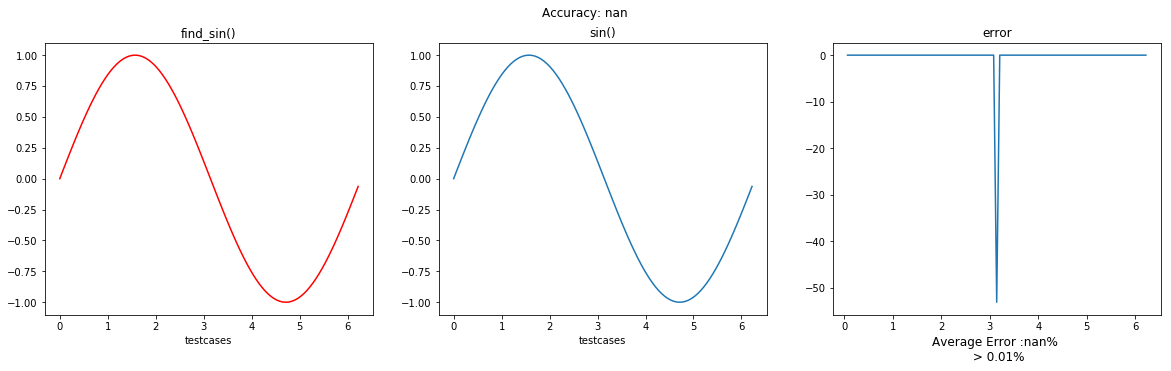

In [55]:
test(find_sin,math.sin,testcase_trig)

#### Setting a precision limit to reduce no.of iterations

In [56]:
%%timeit
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    t1 = 1
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while abs(t1) >= 1e-5:
        term = term*sq
        fact = fact*i*(i-1)*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
        
    return val

cal_sine_cosine2(np.pi/6,1)

2.83 µs ± 289 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### There is significant reduction in the computation time from 12.5 µs ± 103 ns per loop to 3$\mu s$

In [57]:
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = 1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        term = term*sq
        fact = fact*(i*(i-1))*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
    return val, n

def find_cos(x) :
    return cal_sine_cosine2(x,0)

def find_sin(x) :
    return cal_sine_cosine2(x,1)

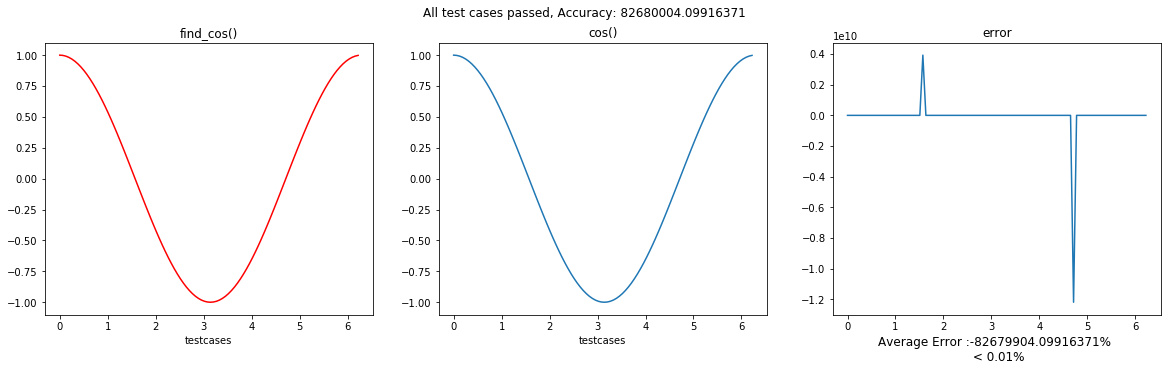

In [58]:
test(find_cos,math.cos,testcase_trig)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


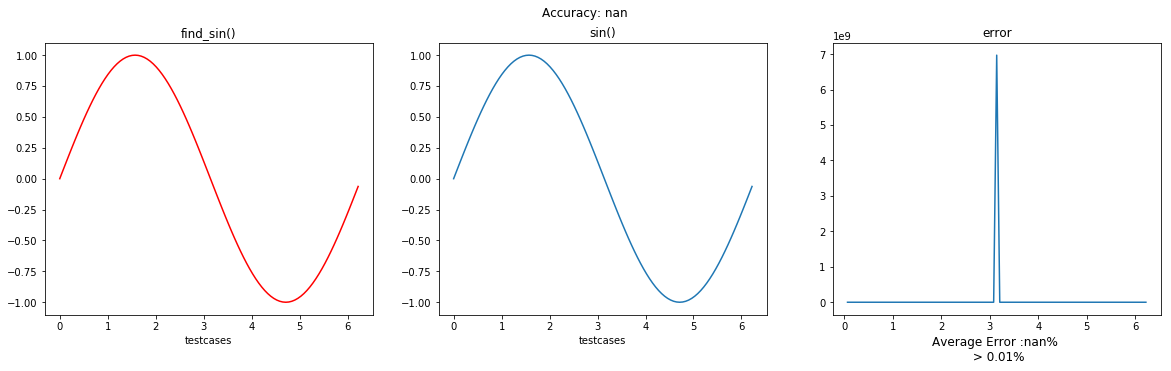

In [59]:
test(find_sin,math.sin,testcase_trig)


<br> We will now replace $\frac{a.a.a...}{1.2.3...}$ by 
<br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})*\frac{k}{i+1}*\frac{k}{i+2}$<br><br>$(\frac{k}{i}*\frac{k}{i+1}*\frac{k}{i+2})*\frac{k}{i+3}*\frac{k}{i+4}$<br><br>$\dots$<br>

In [60]:
%%timeit
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
    return val

cal_sine_cosine3(np.pi/6,1)

2.48 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [61]:
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    con_val = []
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
        n = n + 1
        con_val.append(val)
    return val, n, con_val

def find_cos(x) :
    return cal_sine_cosine3(x,0)
def find_sin(x) :
    return cal_sine_cosine3(x,1)

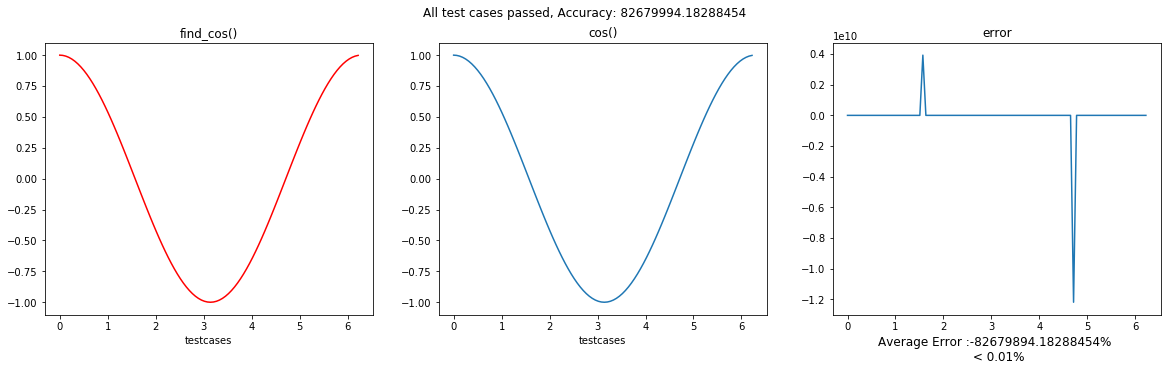

In [62]:
test(find_cos,math.cos,testcase_trig)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


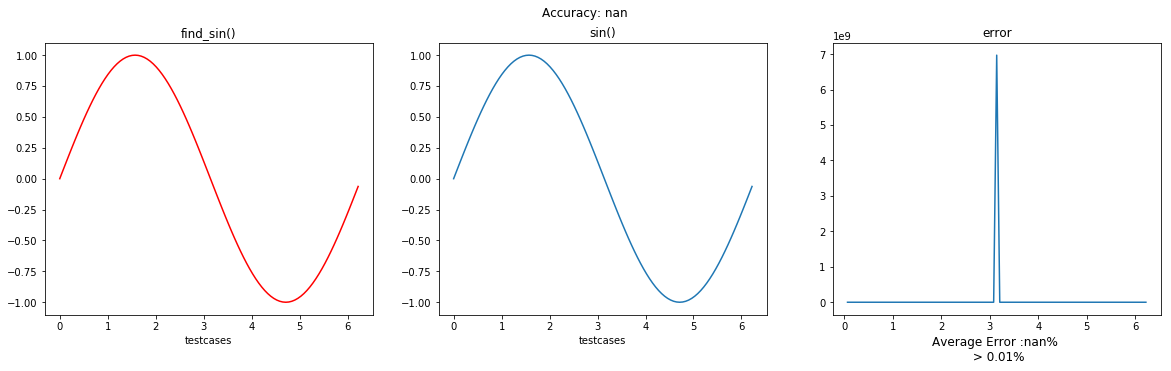

In [63]:
test(find_sin,math.sin,testcase_trig)

In [64]:
x = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
cosx = []
actualcosx = []
cosx_itr = []
sinx = []
actualsinx = []
sinx_itr = []
for i in x :
    tup = cal_sine_cosine3(i,0)
    cosx.append(tup[0])
    cosx_itr.append(tup[1])
    actualcosx.append(math.cos(i))
    tup = cal_sine_cosine3(i,1)
    sinx.append(tup[0])
    sinx_itr.append(tup[1])
    actualsinx.append(math.sin(i))  

We calculated cos(x), sin(x), math.cos(x), math.sin(x), the number of iterations required to calculate each of these values by function cal_sine_cosine(x,i). Lets take a look at visual representation of these values

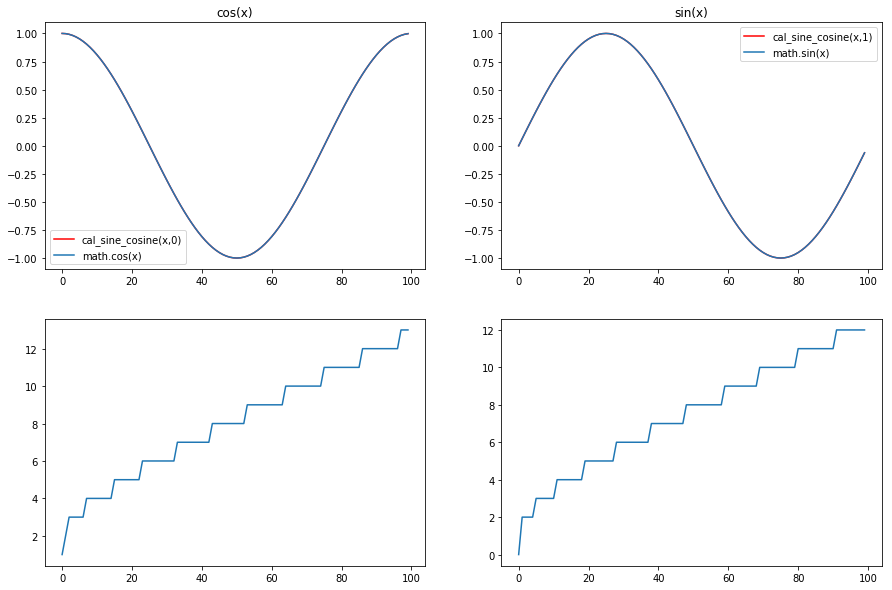

In [65]:
fig, ax = plt.subplots(2,2,figsize=(15,10)) 
ax[0][0].plot(cosx, color ='red')
ax[0][0].plot(actualcosx)
ax[0][0].set_title("cos(x)")
ax[0][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
ax[0][1].plot(sinx, color = 'red')
ax[0][1].plot(actualsinx)
ax[0][1].set_title("sin(x)")
ax[0][1].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
ax[1][0].plot(cosx_itr)
ax[1][1].plot(sinx_itr);

We can see that as the angles approaches 2pi the number of iterations increase. 
<br>Let us consider one of the lasts terms in our list of angles. At each iteration we will store the value of sum that is the value of cos(x) / sin(x) and plot it, then check these values for errors. 

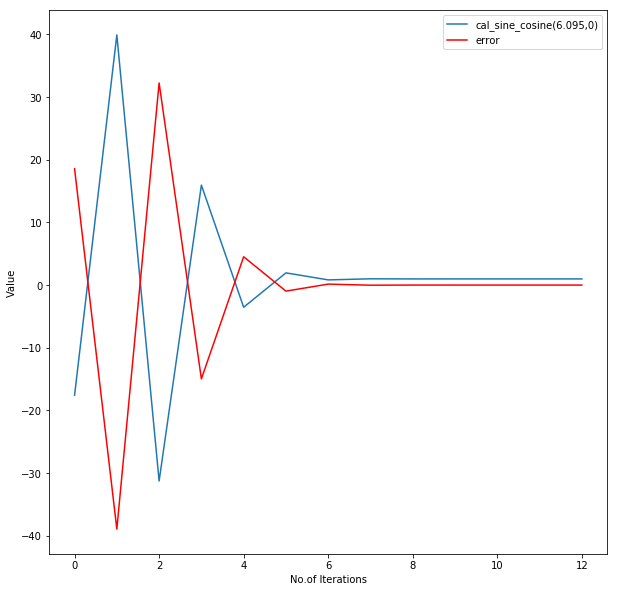

In [66]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
tup = cal_sine_cosine3(x[97],0)
ax.plot(tup[2])
ans = math.cos(x[97])
error = []
for i in tup[2] : 
    error.append(ans - i)
ax.plot(error, color = 'red')
ax.legend(['cal_sine_cosine('+str(round(x[97],3))+',0)', 'error'])
ax.set_xlabel("No.of Iterations")
ax.set_ylabel("Value");

***

Till now we have seen 4 functions that calculate sine and cosine values. Using %%timeit we also found out the computation time required by these functions. 
<br>Now lets take a look at the number of iterations.

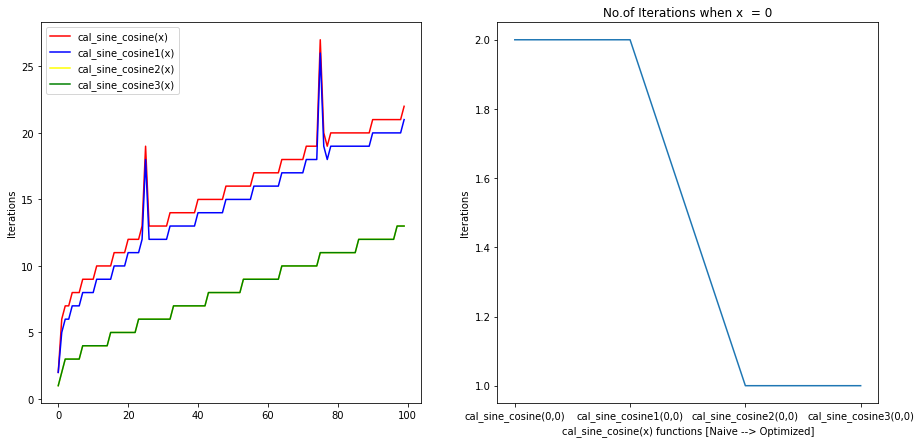

In [67]:
itr = []
itr1 = []
itr2 = []
itr3 = []
for i in x :
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine1(i,0)[1])
    itr2.append(cal_sine_cosine2(i,0)[1])
    itr3.append(cal_sine_cosine3(i,0)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr,color = 'red')
ax[0].plot(itr1, color = 'blue')
ax[0].plot(itr2,color = 'yellow')
ax[0].plot(itr3, color  = 'green')
ax[0].legend(['cal_sine_cosine(x)','cal_sine_cosine1(x)','cal_sine_cosine2(x)','cal_sine_cosine3(x)'])
ax[0].set_ylabel("Iterations")

itr4 = []
itr4.append(cal_sine_cosine(0,0)[1])
itr4.append(cal_sine_cosine1(0,0)[1])
itr4.append(cal_sine_cosine2(0,0)[1])
itr4.append(cal_sine_cosine3(0,0)[1])
xaxis = ["cal_sine_cosine(0,0)","cal_sine_cosine1(0,0)","cal_sine_cosine2(0,0)","cal_sine_cosine3(0,0)"]
ax[1].plot(xaxis,itr4)
ax[1].set_title("No.of Iterations when x  = 0")
ax[1].set_xlabel("cal_sine_cosine(x) functions [Naive --> Optimized]")
ax[1].set_ylabel("Iterations");

The number of iterations have decreased with increased optimization. 
<br>The last two functions have the same no.of iterations that is why you can't see yellow - they overlap
<br>In the second graph at the right, we can see the number of iterations taken by each function to find cos(0)
<br>What if we set a precision limit to our very first naive implementation of calculating sine and cosine, how will the graph for number of iterations look?

In [68]:
def cal_sine_cosine4(x,i) :
    t1 = 1
    val = 0
    sign = -1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        sign  = -sign
        t1 = ((x**(i))/math.factorial(i))*sign
        val = val + t1
        i = i + 2
    return val, n

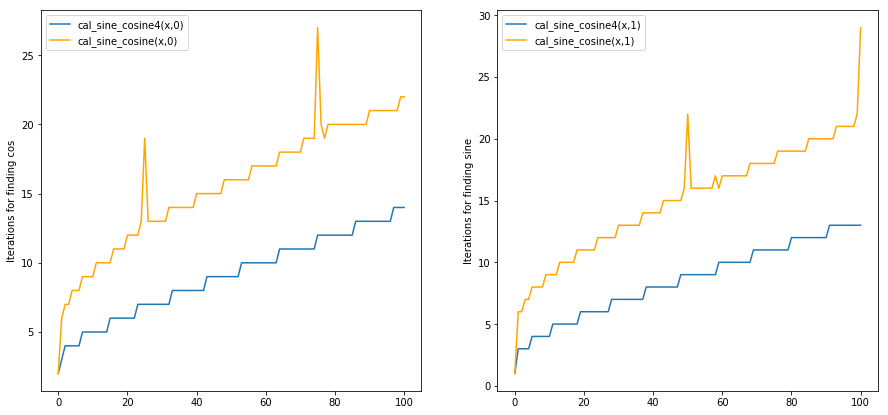

In [69]:
itr4 = []
itr41 = []
itr = []
itr1 = []
angle = np.linspace(0, 2* np.pi  ,num = 101 , endpoint=True)
for i in angle :
    itr4.append(cal_sine_cosine4(i,0)[1])
    itr41.append(cal_sine_cosine4(i,1)[1])
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine(i,1)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr4)
ax[0].plot(itr, color = 'orange')
ax[0].set_ylabel("Iterations for finding cos")
ax[0].legend(['cal_sine_cosine4(x,0)','cal_sine_cosine(x,0)'])
ax[1].plot(itr41)
ax[1].plot(itr1, color = 'orange')
ax[1].set_ylabel("Iterations for finding sine")
ax[1].legend(['cal_sine_cosine4(x,1)','cal_sine_cosine(x,1)']);

The number of iterations are quite lower than the first naive implementation. The computation time required can significantly be reduced by just keeping a proper terminating condition, further optimization can be done to get an even smaller computation time.

***

### Summary 

I started off with the <b>geometric progression</b>, in which I did two cases of optimization :
    - Limiting the no.of iterations.
        - I understood that I could the same accuracy for a lot lower no.of iterations, which would give me a speed up of $300\times$. I also saw the relation between speedup, accuracy, and precision.
    - Replacing the power function.
        - There was a significant reduction in the computation time, as I was not calculating the term at every iteration, instead using the previously calculated term.

In <b>exponential function</b> :
    - Used the previous 2 optimization techniques.
    - Optimized the factorial.
    - Found another case of optimization.
    - Put all of them together
    
In <b>trigonometric function</b> :
    - Used the 4 cases of optimization 
    - Put them togther
    - explored the no.of iterations, error in the values

__________________


In [143]:
# angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
# def testing2(func,i) :
#     if i == 0 :
#         cosx = []
#         actualcos = []
#         error = []
        
#         #finding cos and math.cos for every angle in the list
#         for i in angle :
#             cosofx = func(i,0)[0]
#             actualcosofx = math.cos(i)
#             cosx.append(cosofx)
#             actualcos.append(actualcosofx)
#             error.append(round((actualcosofx - cosofx),7))
            
#         #plotting graph for userdefines and math.cos
#         fig, ax = plt.subplots(2,2,figsize=(10,10))
#         ax[0][0].plot(cosx, color = 'red')
#         ax[0][0].set_title("cal_sine_cosine(x,0)")
#         ax[0][1].plot(actualcos)
#         ax[0][1].set_title("math.cos(x)")
#         ax[1][0].plot(cosx, color = 'red')
#         ax[1][0].plot(actualcos)
#         ax[1][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
#         ax[1][0].set_title("Superimposition of cal_sine_cosine(x,0) and math.cos(x)")
#         ax[1][1].plot(error)
#         ax[1][1].set_title("error")
        
#     if i == 1 :
#         sinx = []
#         actualsin = []
#         error = []
        
#         #finding sin and math.sin for all values in list - angle
#         for i in angle :
#             sinofx = func(i,1)[0]
#             actualsinofx = math.sin(i)
#             sinx.append(sinofx)
#             actualsin.append(actualsinofx)
#             error.append(round((actualsinofx - sinofx),7))
            
#         #plotting graph for user defined function and math.sin
#         fig, ax = plt.subplots(2,2,figsize=(10,10))
#         ax[0][0].plot(sinx, color = 'red')
#         ax[0][0].set_title("cal_sine_cosine(x,1)")
#         ax[0][1].plot(actualsin)
#         ax[0][1].set_title("math.sin(x)")
#         ax[1][0].plot(sinx, color = 'red')
#         ax[1][0].plot(actualsin)
#         ax[1][0].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
#         ax[1][0].set_title("Superimposition of cal_sine_cosine(x,1) and math.sin(x)")
#         ax[1][1].plot(error)
#         ax[1][1].set_title("error")